In [15]:
import os 
import math
import numpy as np
import pandas as pd
from utils.utils import *
from utils.flips import get_prefered_xy
import scipy as sc
import matplotlib.pyplot as plt

In [21]:
models = ['oself']
angle_dict = {}

diff_all_subj_x, diff_all_subj_y = [], []

angle_roi = np.zeros((len(subj_list), len(rois_distances)))
for i, subj in enumerate(subj_list):
    if subj == 'subj06' or subj == 'subj08': 
        
            nan_mask_file = os.path.join(betas_dir, f"{subj}_betas_nans_mask.npy")
            nan_mask = np.load(nan_mask_file, allow_pickle=True)
        
    subj_differences_x, subj_differences_y = [], []
    for hemi in hemis:
                    
        roi_means_x, roi_means_y = [], []
        for j, roi_name in enumerate(rois_distances.keys()):

            if subj == 'subj06' or subj == 'subj08': 

                mask_file = os.path.join(mask_dir, subj, f'{hemi}.short.{subj}.testrois.npy')
                mask = np.load(mask_file, allow_pickle=True)
                to_keep = np.isin(mask, rois_distances[roi_name])
                if hemi == 'lh':
                    current_roi_nans = nan_mask[:mask.shape[0]][to_keep]
                if hemi == 'rh':
                    current_roi_nans = nan_mask[-mask.shape[0]:][to_keep]
                    
                roi_distances_cs_file = os.path.join(label_dir, 'freesurfer', subj,  'label', 'distances',   hemi + '.' + subj + '.dists_wrong.' + roi_name + '.mat')
                roi_distances_cs = sc.io.loadmat(roi_distances_cs_file)['d_roi']
                if current_roi_nans is not None and False in current_roi_nans:
                        #Easy: should work 
                    roi_distances_cs = roi_distances_cs[current_roi_nans][:, current_roi_nans]

            else:
                roi_distances_cs_file = os.path.join(label_dir, 'freesurfer', subj,  'label', 'distances',   hemi + '.' + subj + '.dists.' + roi_name + '.mat')
                roi_distances_cs = sc.io.loadmat(roi_distances_cs_file)['d_roi']

            
            
            roi_distances_cs = roi_distances_cs.flatten()

            differences_path = os.path.join(dist_dir, subj, f'{hemi}.{models[0]}.{subj}.difference.{roi_name}.npy')
            difference = np.array(np.load(differences_path, allow_pickle=True))

            difference = np.vstack(difference) # need to also divided them by their cort surf matrix distance 
            ind_to_take = np.where(roi_distances_cs != 0)[0]  # ignore where the distance is 0 (since its when we compare two equal voxel)
            average_x = np.mean(difference[:, 0][ind_to_take] / roi_distances_cs[ind_to_take])
            average_y = np.mean(difference[:, 1][ind_to_take] / roi_distances_cs[ind_to_take])
            roi_means_x.append(average_x)
            roi_means_y.append(average_y)
            angle_roi[i, j] = np.arctan2(average_x, average_y) * (180/np.pi)
        subj_differences_x.append(np.mean(roi_means_x))
        subj_differences_y.append(np.mean(roi_means_y))
    diff_all_subj_x.append(np.mean(subj_differences_x))
    diff_all_subj_y.append(np.mean(subj_differences_y))
angle = np.arctan2(np.mean(diff_all_subj_x), np.mean(diff_all_subj_y)) * (180/np.pi)

angle

86.5924570866991

In [22]:
angle_roi_oself_df = pd.DataFrame(angle_roi, index=subj_list, columns=list(rois_distances.keys()))
angle_roi_oself_df

,V1,V2v,V2d,V3v,V3d,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,96.395328,90.620296,99.013773,117.252052,122.689548,53.652596,129.235571,29.484281,21.648602,44.097562,49.617594,129.845576,112.172877,48.334672
subj02,87.099505,91.681338,92.783465,120.254191,121.113393,89.184194,109.963843,137.156474,109.693954,166.102696,80.081724,98.789872,78.026196,85.848114
subj03,75.670464,84.706566,80.064686,83.376595,91.827727,91.977005,102.828285,87.620469,86.792816,103.284612,74.742034,104.535315,66.094254,73.119352
subj04,92.393385,102.977349,94.145110,129.293240,122.707562,97.049502,88.886984,132.612337,131.713546,111.717485,83.973094,81.294248,94.598186,85.923300
subj05,59.487367,70.478443,71.463164,75.129255,81.358147,82.820381,92.297083,81.384370,83.021687,90.326026,89.687461,90.674501,97.848862,26.363035
subj06,64.918863,109.986460,90.318468,108.044194,95.770202,98.348639,96.743912,133.534107,83.590188,136.578925,91.325307,87.998052,96.434419,86.604498
subj07,102.020945,95.826653,87.759238,132.760519,132.156115,85.370393,110.898725,116.993534,127.994572,108.271967,108.033158,69.555213,80.958194,139.169198
subj08,46.301073,39.076778,42.543064,52.925429,47.445400,46.564636,46.978151,61.451297,75.467739,46.573419,30.836260,99.042257,110.419354,60.012778


In [23]:
angle_roi_oself_df.to_csv('angle_roi_oself.csv')

In [24]:
models = ['best_roi']
angle_dict = {}

diff_all_subj_x, diff_all_subj_y = [], []

angle_roi = np.zeros((len(subj_list), len(rois_distances)))
for i, subj in enumerate(subj_list):
    if subj == 'subj06' or subj == 'subj08': 
        
            nan_mask_file = os.path.join(betas_dir, f"{subj}_betas_nans_mask.npy")
            nan_mask = np.load(nan_mask_file, allow_pickle=True)
        
    subj_differences_x, subj_differences_y = [], []
    for hemi in hemis:
                    
        roi_means_x, roi_means_y = [], []
        for j, roi_name in enumerate(rois_distances.keys()):

            if subj == 'subj06' or subj == 'subj08': 

                mask_file = os.path.join(mask_dir, subj, f'{hemi}.short.{subj}.testrois.npy')
                mask = np.load(mask_file, allow_pickle=True)
                to_keep = np.isin(mask, rois_distances[roi_name])
                if hemi == 'lh':
                    current_roi_nans = nan_mask[:mask.shape[0]][to_keep]
                if hemi == 'rh':
                    current_roi_nans = nan_mask[-mask.shape[0]:][to_keep]
                    
                roi_distances_cs_file = os.path.join(label_dir, 'freesurfer', subj,  'label', 'distances',   hemi + '.' + subj + '.dists_wrong.' + roi_name + '.mat')
                roi_distances_cs = sc.io.loadmat(roi_distances_cs_file)['d_roi']
                if current_roi_nans is not None and False in current_roi_nans:
                        #Easy: should work 
                    roi_distances_cs = roi_distances_cs[current_roi_nans][:, current_roi_nans]

            else:
                roi_distances_cs_file = os.path.join(label_dir, 'freesurfer', subj,  'label', 'distances',   hemi + '.' + subj + '.dists.' + roi_name + '.mat')
                roi_distances_cs = sc.io.loadmat(roi_distances_cs_file)['d_roi']

            
            
            roi_distances_cs = roi_distances_cs.flatten()

            differences_path = os.path.join(dist_dir, subj, f'{hemi}.{models[0]}.{subj}.difference.{roi_name}.npy')
            difference = np.array(np.load(differences_path, allow_pickle=True))

            difference = np.vstack(difference) # need to also divided them by their cort surf matrix distance 
            ind_to_take = np.where(roi_distances_cs != 0)[0]  # ignore where the distance is 0 (since its when we compare two equal voxel)
            average_x = np.mean(difference[:, 0][ind_to_take] / roi_distances_cs[ind_to_take])
            average_y = np.mean(difference[:, 1][ind_to_take] / roi_distances_cs[ind_to_take])
            roi_means_x.append(average_x)
            roi_means_y.append(average_y)
            angle_roi[i, j] = np.arctan2(average_x, average_y) * (180/np.pi)
        subj_differences_x.append(np.mean(roi_means_x))
        subj_differences_y.append(np.mean(roi_means_y))
    diff_all_subj_x.append(np.mean(subj_differences_x))
    diff_all_subj_y.append(np.mean(subj_differences_y))
angle = np.arctan2(np.mean(diff_all_subj_x), np.mean(diff_all_subj_y)) * (180/np.pi)

angle

88.13842914536443

In [25]:
angle_roi_best_roi_df = pd.DataFrame(angle_roi, index=subj_list, columns=list(rois_distances.keys()))
angle_roi_best_roi_df

,V1,V2v,V2d,V3v,V3d,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,110.974047,108.584462,107.692959,78.754339,95.057797,97.725096,53.365283,104.858317,107.585609,98.968761,83.197221,86.477697,112.045217,117.828437
subj02,83.534366,120.508355,115.582131,100.001839,92.943426,78.760065,91.977946,158.986010,114.480481,129.220139,88.526604,96.955030,89.048500,88.748595
subj03,74.345918,93.861563,80.187787,77.779085,90.168101,82.786462,86.619093,94.755113,107.271268,80.774621,89.984814,104.988232,79.249826,67.031213
subj04,92.579062,133.955278,114.874242,113.551897,101.354163,78.306543,87.376701,81.532947,110.534327,119.965977,77.244212,83.429426,77.396958,120.562614
subj05,66.759239,73.342221,74.994033,78.408572,75.081697,92.020137,82.525306,91.405336,85.971126,87.773348,94.590369,91.951692,49.705848,82.976833
subj06,93.484946,108.687571,97.561194,88.878849,89.324702,88.728032,108.754809,53.959509,42.625251,33.902832,92.253400,85.542691,102.160859,88.520833
subj07,86.577772,120.992406,115.637679,109.657795,115.813135,73.202257,98.168022,79.159363,90.373321,81.163047,72.223291,69.607179,71.627999,86.715573
subj08,40.767077,50.576734,56.961101,55.218499,52.298360,58.999367,123.125502,97.300275,89.657072,72.347771,74.341794,103.670136,116.248279,97.931231


In [27]:
angle_roi_best_roi_df.to_csv('angle_roi_best_roi.csv')

In [36]:
model = "oself"
csv_file = os.path.join(proj_dir, 'stats', 'angular_test' ,f'BF_angluar_test_preferedxy_{model}.csv')
pd.read_csv(csv_file,header=0,index_col=0)

,rois,pH0,pHa,BF
1,V1,0.001358,0.998642,735.377194
2,V2v,0.001948,0.998052,512.467323
3,V2d,0.001052,0.998948,949.335320
4,V3v,0.005908,0.994092,168.266187
5,V3d,0.005529,0.994471,179.873764
6,hV4,0.001327,0.998673,752.531716
7,VO-1,0.002559,0.997441,389.773807
8,VO-2,0.032360,0.967640,29.902342
9,PHC-1,0.015317,0.984683,64.285548
10,PHC-2,0.043942,0.956058,21.757389


pH0 = posterior model probability  of circular uniformity 
High BF factor for all 
pHa = alternative: von Mises 

KeyError: 0

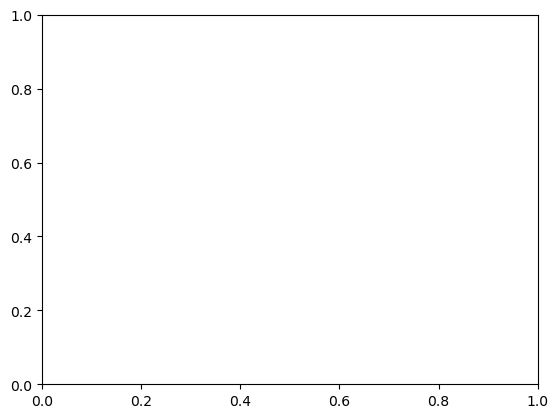

In [34]:
plt.table(df)